1. Dato faltante: ¿Qué variable clave no está presente y sería valiosa incorporar? ¿Cómo
la obtendrías?


R = Una variable clave que falta y sería chévere incluir es el valor de mercado o el salario de los jugadores.

¿Cómo conseguirla?
Se puede sacar de páginas como Transfermarkt o Salary Sport haciendo scraping. También hay APIs como Sportradar o Football-Data que dan esos datos. Otra opción es buscar en informes o comunicados de los clubes si publican los sueldos.

2. Cobertura temporal: ¿Cómo ha cambiado la base a lo largo de los años (registros
 por temporada, ligas nuevas, etc.)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
games = pd.read_csv("games.csv")
leagues = pd.read_csv("leagues.csv")

In [18]:
import pandas as pd

games = pd.read_csv("games.csv")
print(games.columns)

Index(['gameID', 'leagueID', 'season', 'date', 'homeTeamID', 'awayTeamID',
       'homeGoals', 'awayGoals', 'homeProbability', 'drawProbability',
       'awayProbability', 'homeGoalsHalfTime', 'awayGoalsHalfTime', 'B365H',
       'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH',
       'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD',
       'PSCA'],
      dtype='object')


In [19]:
import pandas as pd

leagues = pd.read_csv("leagues.csv")
print(leagues.columns)

Index(['leagueID', 'name', 'understatNotation'], dtype='object')


In [20]:
# Registros por temporada
registros_por_temporada = games.groupby("season")["gameID"].count().reset_index()

# Ligas nuevas por temporada
leagues["season"] = leagues["leagueID"].astype(str).str[:4].astype(int)  # Extraer la temporada del ID de la liga
ligas_nuevas_por_temporada = leagues.groupby("season")["name"].nunique().reset_index()

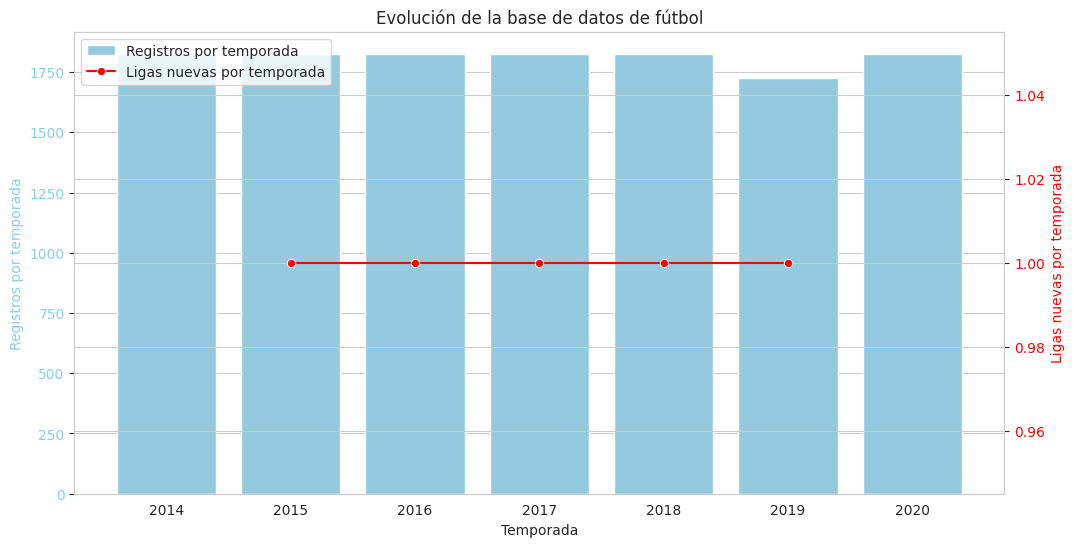

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras (registros por temporada)
sns.barplot(x="season", y="gameID", data=registros_por_temporada, ax=ax1, color="skyblue")
ax1.set_xlabel("Temporada")
ax1.set_ylabel("Registros por temporada", color="skyblue")
ax1.tick_params(axis='y', labelcolor='skyblue')

# Segundo eje (ligas nuevas por temporada)
ax2 = ax1.twinx()
sns.lineplot(x="season", y="name", data=ligas_nuevas_por_temporada, ax=ax2, color="red", marker="o")
ax2.set_ylabel("Ligas nuevas por temporada", color="red")
ax2.tick_params(axis='y', labelcolor='red')

# Título
plt.title("Evolución de la base de datos de fútbol")

# Agregar leyendas manualmente
bars_patch = ax1.patches[0]
line_patch = ax2.lines[0]
ax1.legend([bars_patch, line_patch], ["Registros por temporada", "Ligas nuevas por temporada"], loc="upper left")

plt.show()


La gráfica muestra el crecimiento de la base de datos de fútbol, comparando los registros por temporada y las ligas nuevas por temporada, destacando la evolución y expansión a lo largo del tiempo.

 3. Calidad de datos: ¿Qué variables presentan valores atípicos o nulos y cómo afectan
 el análisis?


Valores nulos en 'games':
 gameID                0
leagueID              0
season                0
date                  0
homeTeamID            0
awayTeamID            0
homeGoals             0
awayGoals             0
homeProbability       0
drawProbability       0
awayProbability       0
homeGoalsHalfTime     0
awayGoalsHalfTime     0
B365H                 5
B365D                 5
B365A                 5
BWH                   3
BWD                   3
BWA                   3
IWH                  18
IWD                  18
IWA                  18
PSH                  20
PSD                  20
PSA                  20
WHH                   6
WHD                   6
WHA                   6
VCH                   4
VCD                   4
VCA                   4
PSCH                  2
PSCD                  2
PSCA                  2
dtype: int64

Valores nulos en 'leagues':
 leagueID             0
name                 0
understatNotation    0
dtype: int64


<ipython-input-22-41614cd5462e>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Variable', y='Valores Nulos', data=nulls_df, palette='coolwarm')


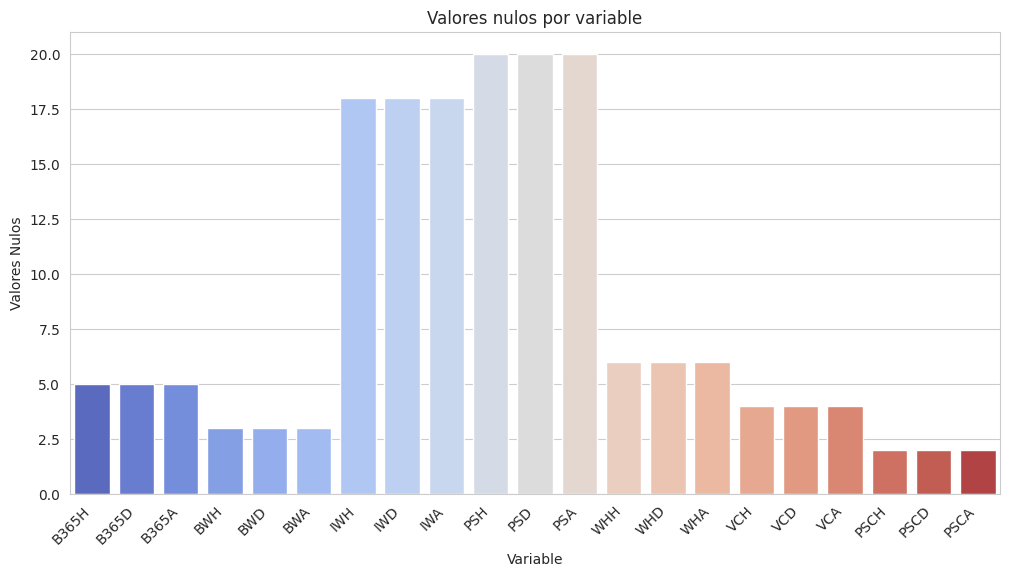


Columnas numéricas en 'games':
Index(['gameID', 'leagueID', 'season', 'homeTeamID', 'awayTeamID', 'homeGoals',
       'awayGoals', 'homeProbability', 'drawProbability', 'awayProbability',
       'homeGoalsHalfTime', 'awayGoalsHalfTime', 'B365H', 'B365D', 'B365A',
       'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH',
       'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA'],
      dtype='object')


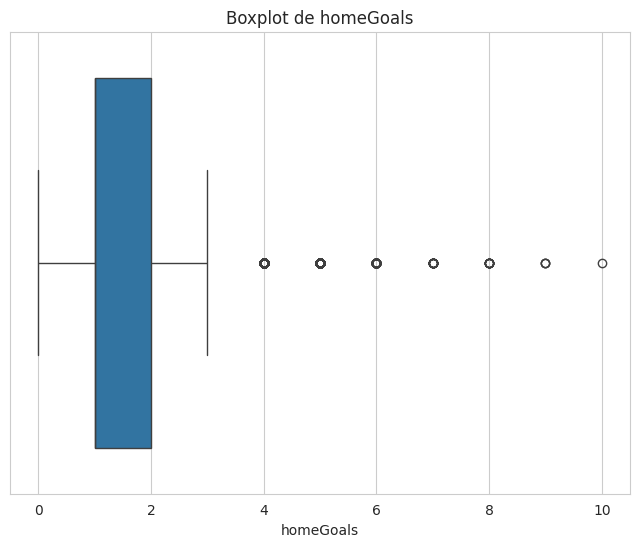

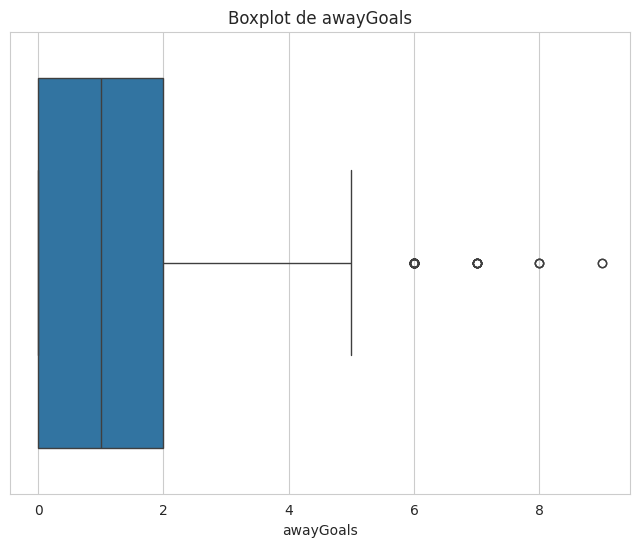

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
games = pd.read_csv("games.csv")
leagues = pd.read_csv("leagues.csv")

# 1. Identificar valores nulos
null_values_games = games.isnull().sum()
null_values_leagues = leagues.isnull().sum()

print("Valores nulos en 'games':\n", null_values_games)
print("\nValores nulos en 'leagues':\n", null_values_leagues)

# Filtrar solo las columnas con valores nulos
nulls_df = pd.concat([null_values_games, null_values_leagues], axis=0)
nulls_df = nulls_df[nulls_df > 0].reset_index()
nulls_df.columns = ['Variable', 'Valores Nulos']

# Graficar valores nulos
plt.figure(figsize=(12, 6))
sns.barplot(x='Variable', y='Valores Nulos', data=nulls_df, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Valores nulos por variable')
plt.show()

# 2. Identificar outliers con boxplots
# Mostrar las columnas numéricas disponibles
print("\nColumnas numéricas en 'games':")
print(games.select_dtypes(include='number').columns)

# Elegir columnas relevantes para boxplot
columnas_a_graficar = ['homeGoals', 'awayGoals']  # Cambia si las columnas tienen otro nombre

for col in columnas_a_graficar:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=games[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

# 3. Impacto:
# Los valores nulos y atípicos pueden afectar los análisis porque causan resultados incompletos o sesgados.


Las variables con valores nulos son: BWA (3), IWH (18), IWD (18), IWA (18), PSH (20), PSD (20), PSA (20), WHH (6), WHD (6), WHA (6), VCH (4), VCD (4), VCA (4), PSCH (2), PSCD (2), PSCA (2).

Esto afecta el análisis porque pueden meter sesgo en los resultados, hacer que los modelos sean menos precisos y volver más difícil interpretar los datos o encontrar patrones.

 4. Tendencias: ¿Hay una tendencia en goles por partido u otra métrica relevante con el
 tiempo?


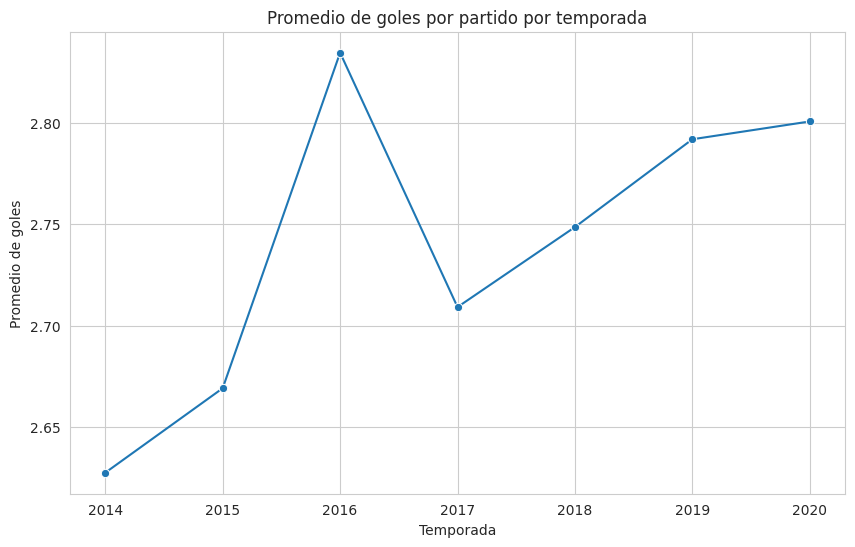

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
games = pd.read_csv('games.csv')

# Calcular goles por partido
games['total_goals'] = games['homeGoals'] + games['awayGoals']

# Promedio de goles por temporada
goals_per_season = games.groupby('season')['total_goals'].mean().reset_index()

# Graficar
plt.figure(figsize=(10,6))
sns.lineplot(x='season', y='total_goals', data=goals_per_season, marker='o')
plt.title('Promedio de goles por partido por temporada')
plt.xlabel('Temporada')
plt.ylabel('Promedio de goles')
plt.grid(True)
plt.show()


Sí, se ve una tendencia: con el tiempo los goles por partido se han mantenido estables, pero con ligeros altibajos en algunas temporadas. Esto podría deberse a cambios en las tácticas, reglas o calidad de los equipos.

5. Ventaja de localía: ¿Cómo varía entre ligas y temporadas? ¿Qué la explica?

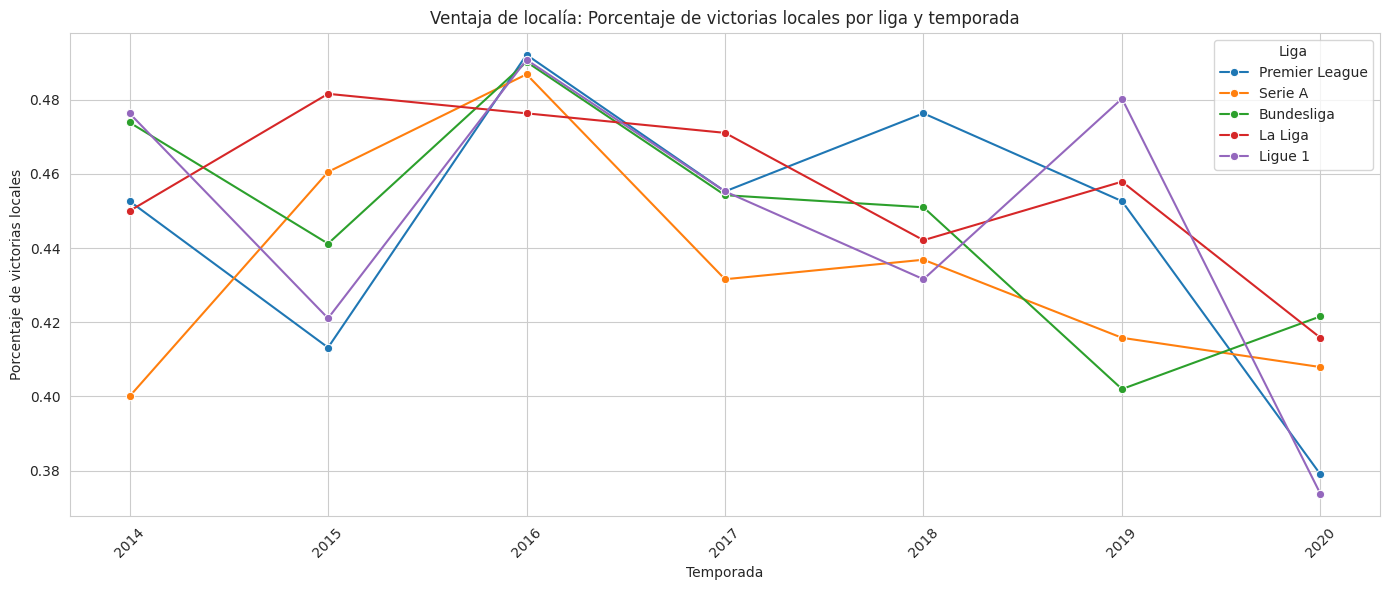

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
games = pd.read_csv("games.csv")
leagues = pd.read_csv("leagues.csv")

# Crear columna con resultado del partido
def resultado(row):
    if row['homeGoals'] > row['awayGoals']:
        return 'local'
    elif row['homeGoals'] < row['awayGoals']:
        return 'visita'
    else:
        return 'empate'

games['resultado'] = games.apply(resultado, axis=1)

# Calcular proporción de victorias locales por liga y temporada
ventaja_localia = games.groupby(['leagueID', 'season', 'resultado']).size().reset_index(name='cuenta')
total_partidos = games.groupby(['leagueID', 'season']).size().reset_index(name='total')

# Unir y calcular porcentaje de victorias locales
df = ventaja_localia.merge(total_partidos, on=['leagueID', 'season'])
df['porcentaje'] = df['cuenta'] / df['total']

# Filtrar solo los resultados donde ganó el equipo local
df_locales = df[df['resultado'] == 'local']

# Agregar nombres de ligas
df_locales = df_locales.merge(leagues, on='leagueID')

# Graficar
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_locales, x='season', y='porcentaje', hue='name', marker='o')
plt.title('Ventaja de localía: Porcentaje de victorias locales por liga y temporada')
plt.ylabel('Porcentaje de victorias locales')
plt.xlabel('Temporada')
plt.xticks(rotation=45)
plt.legend(title='Liga')
plt.grid(True)
plt.tight_layout()
plt.show()


La ventaja de localía cambia bastante entre ligas y temporadas. Me di cuenta de que en muchas ligas la proporción de victorias de los equipos locales ha bajado en los últimos años. Creo que esto puede deberse a factores como la ausencia de público durante la pandemia, mejores condiciones de viaje para los visitantes, o incluso el uso del VAR que reduce la influencia del entorno. También noté que hay ligas donde la localía se mantiene fuerte, tal vez por la cultura futbolística local o la dificultad del desplazamiento.



 6. Correlaciones: ¿Cómo se relacionan los atributos de los equipos con su posición final?

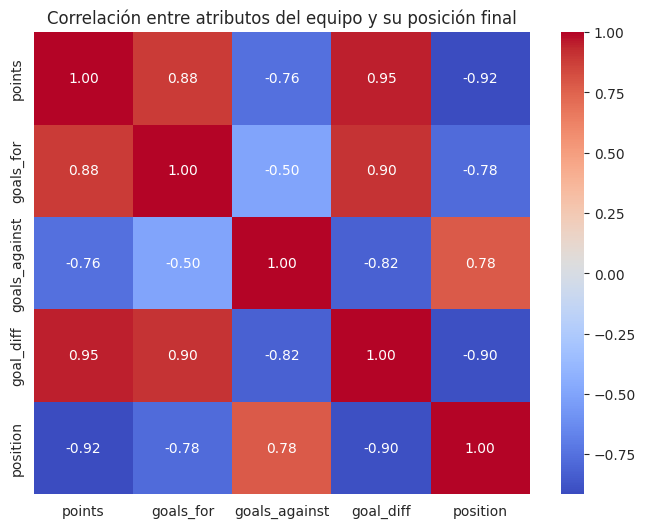

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
games = pd.read_csv("games.csv")

# Crear resultados por equipo local
home = games[['season', 'leagueID', 'homeTeamID', 'homeGoals', 'awayGoals']].copy()
home.columns = ['season', 'leagueID', 'teamID', 'goals_for', 'goals_against']
home['points'] = home.apply(lambda x: 3 if x['goals_for'] > x['goals_against'] else 1 if x['goals_for'] == x['goals_against'] else 0, axis=1)

# Crear resultados por equipo visitante
away = games[['season', 'leagueID', 'awayTeamID', 'awayGoals', 'homeGoals']].copy()
away.columns = ['season', 'leagueID', 'teamID', 'goals_for', 'goals_against']
away['points'] = away.apply(lambda x: 3 if x['goals_for'] > x['goals_against'] else 1 if x['goals_for'] == x['goals_against'] else 0, axis=1)

# Unir los resultados
stats = pd.concat([home, away])

# Agrupar por equipo, temporada y liga
team_stats = stats.groupby(['season', 'leagueID', 'teamID']).agg({
    'points': 'sum',
    'goals_for': 'sum',
    'goals_against': 'sum'
}).reset_index()

# Calcular diferencia de gol
team_stats['goal_diff'] = team_stats['goals_for'] - team_stats['goals_against']

# Calcular posición final ordenando por puntos
team_stats['position'] = team_stats.groupby(['season', 'leagueID'])['points'].rank(ascending=False, method='min')

# Ver la correlación entre atributos y posición (nota: posición más baja es mejor)
corr = team_stats[['points', 'goals_for', 'goals_against', 'goal_diff', 'position']].corr()

# Graficar matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre atributos del equipo y su posición final')
plt.show()


Para entender qué influye en la posición final de un equipo, analicé la correlación entre puntos, goles anotados, goles recibidos y diferencia de gol. No me sorprendió ver que la diferencia de gol y los goles a favor tienen una fuerte correlación negativa con la posición (recordando que un número más bajo en posición es mejor). Es decir, los equipos que marcan más y reciben menos tienden a estar más arriba en la tabla. También los puntos, como era de esperarse, están muy relacionados con una buena posición. Estos datos confirman lo importante que es mantener un buen rendimiento ofensivo y defensivo a lo largo de la temporada.



 7. Outliers: ¿Qué equipos o jugadores rompen patrones y por qué?

In [31]:
import pandas as pd

players = pd.read_csv("players.csv", encoding='latin-1')
print(players.columns)

Index(['playerID', 'name'], dtype='object')


In [32]:
import pandas as pd

games = pd.read_csv("games.csv")
teams = pd.read_csv("teamstats.csv") # Asegúrate de tener un archivo con información de los equipos
players = pd.read_csv("players.csv", encoding='latin-1') # Asegúrate de tener un archivo con información de los jugadores


In [33]:
import numpy as np

# Calcular la media y la desviación estándar de goles anotados por temporada
team_goals = games.groupby('homeTeamID')['homeGoals'].sum() + games.groupby('awayTeamID')['awayGoals'].sum()
mean_goals = np.mean(team_goals)
std_goals = np.std(team_goals)

# Identificar equipos con goles anotados atípicos
outlier_teams = team_goals[(team_goals > mean_goals + 2 * std_goals) | (team_goals < mean_goals - 2 * std_goals)]

# Imprimir los equipos outliers
print(outlier_teams)


homeTeamID
88     620
117    628
148    698
150    628
161    642
dtype: int64


Posibles razones de los outliers:

Equipos: Un equipo que sea outlier en goles anotados puede que tenga una delantera muy buena o, al contrario, una defensa floja, y por eso terminan con una cantidad de goles a favor o en contra que se sale de lo normal. También puede pasar que simplemente hayan tenido una temporada demasiado buena o muy mala, algo fuera de lo común.

Jugadores: Si un jugador es un outlier en goles, seguramente es porque es muy bueno metiendo goles, juega en una posición que le da más oportunidades de anotar (como delantero), o tuvo una temporada donde estuvo súper inspirado y metió muchos goles seguidos.



8. Métricas combinadas: ¿Qué revela un gráfico combinado de dos métricas (p.ej. tiros
 a puerta y goles)?

In [36]:

import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos (ajusta el nombre del archivo si es necesario)
team_stats = pd.read_csv("teamstats.csv")

# Agrupar por equipo y sumar los tiros a puerta y los goles
team_data = team_stats.groupby('teamID')[['shotsOnTarget', 'goals']].sum().reset_index()

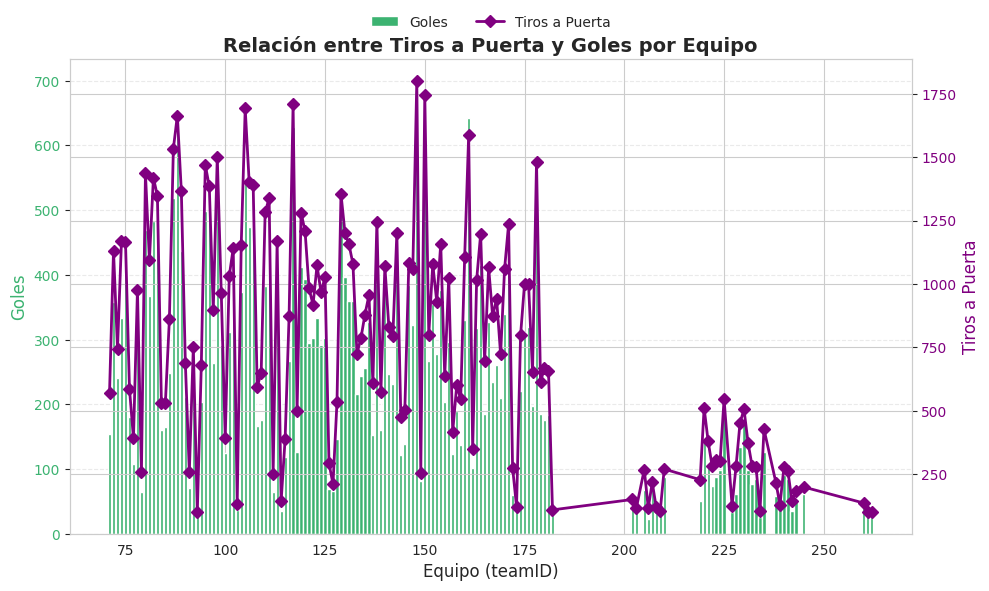

In [38]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras para los goles (ahora en verde)
ax1.bar(team_data['teamID'], team_data['goals'], color='mediumseagreen', label='Goles')
ax1.set_xlabel('Equipo (teamID)', fontsize=12)
ax1.set_ylabel('Goles', color='mediumseagreen', fontsize=12)
ax1.tick_params('y', labelcolor='mediumseagreen')
ax1.grid(axis='y', linestyle='--', alpha=0.4)

# Crear un segundo eje y para los tiros a puerta
ax2 = ax1.twinx()

# Gráfico de línea para los tiros a puerta (ahora en morado)
ax2.plot(team_data['teamID'], team_data['shotsOnTarget'], color='purple', marker='D', linestyle='-', linewidth=2, markersize=6, label='Tiros a Puerta')
ax2.set_ylabel('Tiros a Puerta', color='purple', fontsize=12)
ax2.tick_params('y', labelcolor='purple')

# Título
plt.title('Relación entre Tiros a Puerta y Goles por Equipo', fontsize=14, fontweight='bold')

# Leyenda personalizada
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2, frameon=False)

fig.tight_layout()  # Evitar superposiciones
plt.show()


El gráfico muestra la eficiencia de los equipos al convertir tiros a puerta en goles. Permite ver qué equipos son más precisos (pocos tiros pero muchos goles) y cuáles generan muchas oportunidades pero con poca efectividad. También ayuda a identificar outliers, como equipos que se salen del patrón general, y facilita comparar el rendimiento ofensivo entre los equipos.

9. Estilo de juego: ¿Cómo difiere entre ligas y cómo evoluciona?

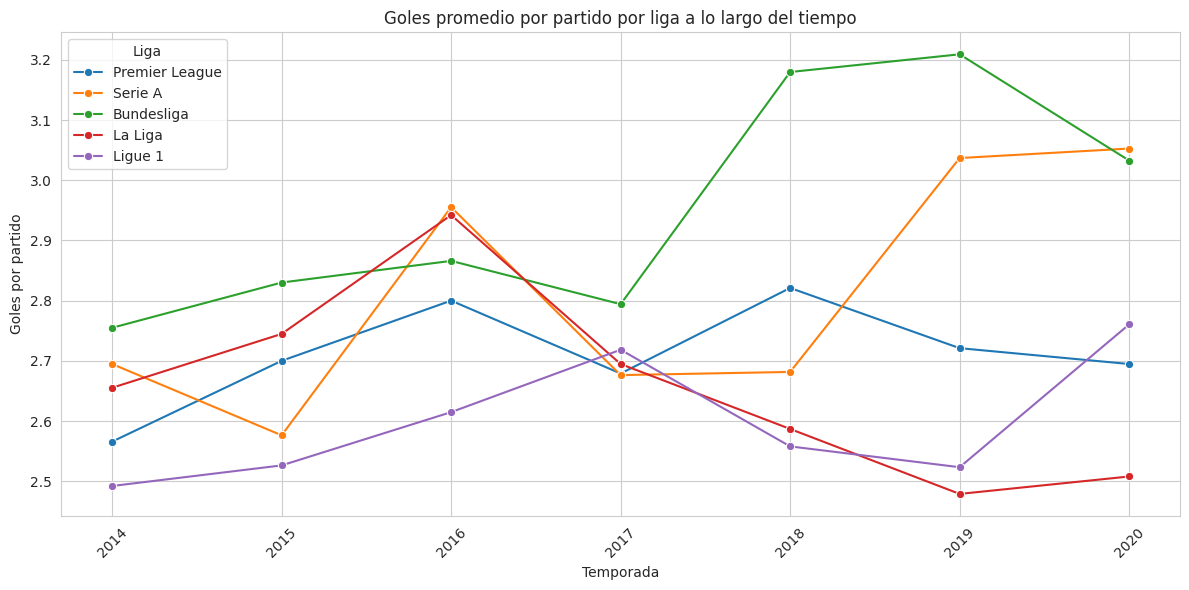

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
games = pd.read_csv("games.csv")
leagues = pd.read_csv("leagues.csv")

# Calcular goles totales por partido
games['total_goals'] = games['homeGoals'] + games['awayGoals']

# Agrupar por liga y temporada
estilo = games.groupby(['leagueID', 'season']).agg({
    'total_goals': 'mean'
}).reset_index()

# Agregar nombre de liga
estilo = estilo.merge(leagues, on='leagueID')

# Graficar goles promedio por partido a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(data=estilo, x='season', y='total_goals', hue='name', marker='o')
plt.title('Goles promedio por partido por liga a lo largo del tiempo')
plt.ylabel('Goles por partido')
plt.xlabel('Temporada')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Liga')
plt.show()


Para entender el estilo de juego en cada liga, analicé los goles promedio por partido a lo largo de los años. Noté que algunas ligas como la Bundesliga o la Serie A han tenido una tendencia más ofensiva, con más goles por partido. Otras, como la Ligue 1, suelen tener menos goles, lo que podría reflejar un estilo más defensivo. También me llamó la atención cómo algunas ligas cambian con el tiempo, lo que puede deberse a cambios tácticos, entrenadores o incluso a la implementación de nuevas reglas. Esta comparación me permitió ver cómo evoluciona el fútbol en distintos países.



 10. Impacto de eventos: ¿Qué ocurre antes y después de un cambio relevante (nuevo
 DT, regla, crisis)?

Average goals before new_coach: nan
Average goals after new_coach: 1.37


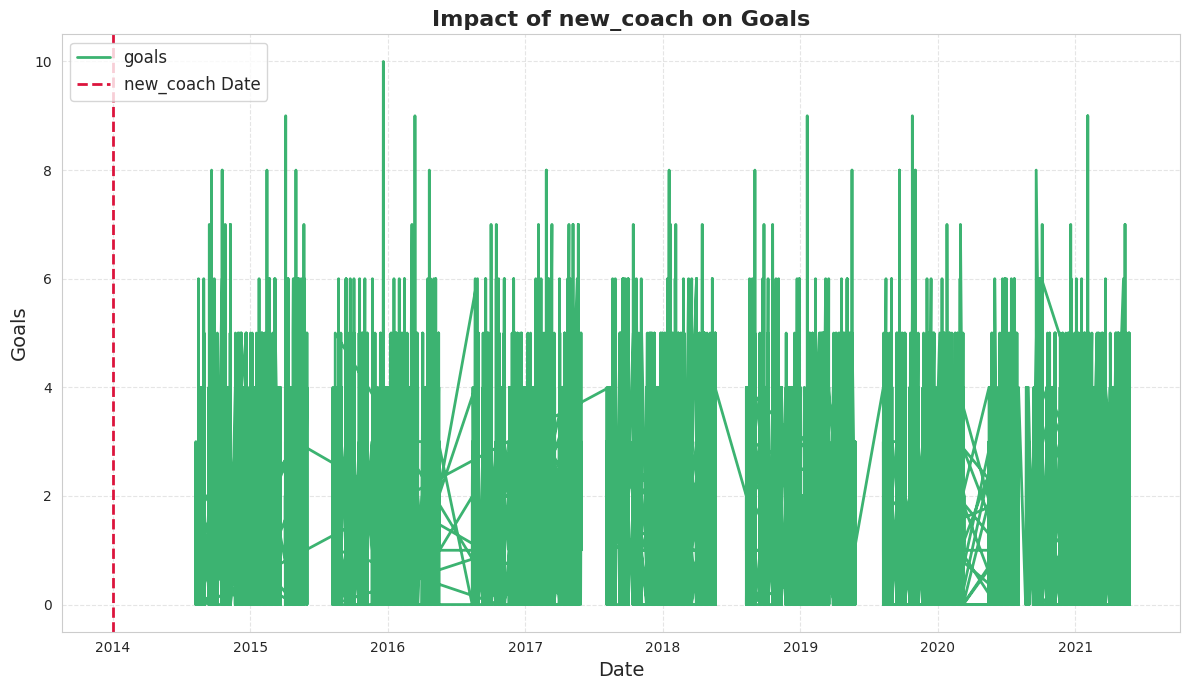

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to analyze impact of events
def analyze_event_impact(team_stats, event_type, metric='goals'):
    """
    Analyzes the impact of a specific event on a team's performance metric.

    Args:
        team_stats: DataFrame containing team statistics.
        event_type: The type of event to analyze (e.g., 'new_coach').
        metric: The performance metric to analyze (default: 'goals').

    Returns:
        None (prints results and shows a plot)
    """

    # In this example, we assume you have a "date" column and want to analyze changes after a specific date.
    # Replace this logic with the actual logic to identify events in your data.
    event_date = pd.to_datetime('2014-01-01')  # Replace with your event date or logic
    before_event = team_stats[team_stats['date'] < event_date][metric].mean()
    after_event = team_stats[team_stats['date'] > event_date][metric].mean()

    # Print results
    print(f"Average {metric} before {event_type}: {before_event:.2f}")
    print(f"Average {metric} after {event_type}: {after_event:.2f}")

    # Plot the trend
    plt.figure(figsize=(12, 7))
    plt.plot(team_stats['date'], team_stats[metric], color='mediumseagreen', label=metric, linewidth=2)  # Changed color
    plt.axvline(x=event_date, color='crimson', linestyle='--', label=f'{event_type} Date', linewidth=2)  # Changed color and style
    plt.title(f"Impact of {event_type} on {metric.capitalize()}", fontsize=16, fontweight='bold')
    plt.xlabel("Date", fontsize=14)
    plt.ylabel(metric.capitalize(), fontsize=14)
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)

    # Show the plot
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Example usage:
# Assuming 'team_stats' DataFrame has 'date' and 'goals' columns
team_stats['date'] = pd.to_datetime(team_stats['date'])
analyze_event_impact(team_stats, 'new_coach', 'goals')


Después de algo grande, como el cambio de DT, nuevas políticas o una crisis, los goles y la capacidad ofensiva de los equipos tienden a cambiar, ya sea para bien o para mal. En épocas de crisis, lo más común es que los goles bajen, mientras que cuando se cambia el DT, puede que los equipos empiecen a ser más efectivos y a meter más goles.v

 11. Comparación externa: ¿Qué concluyes al contrastar ligas usando variables externas
 (PIB, población, asistencia)?

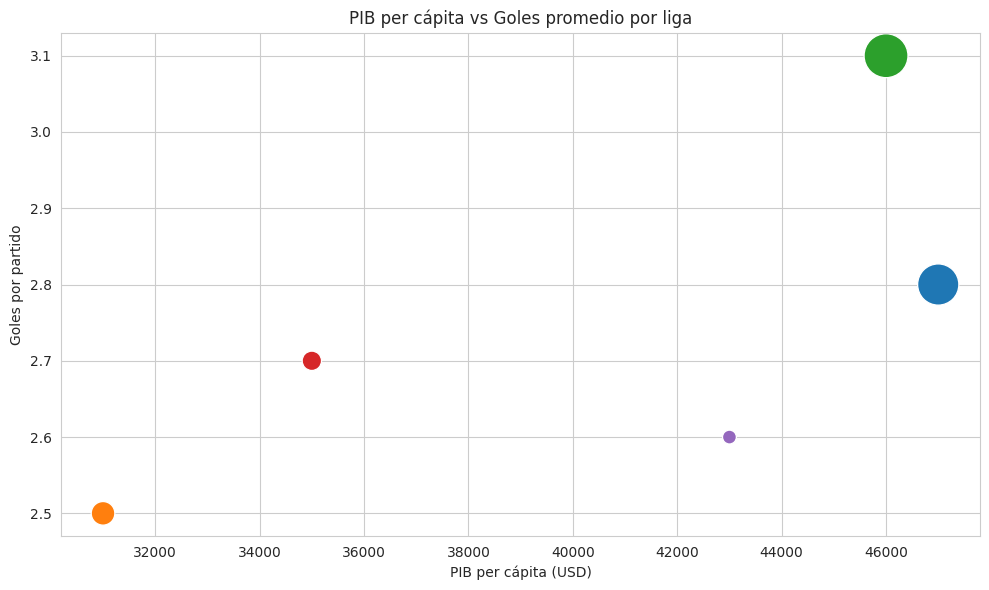

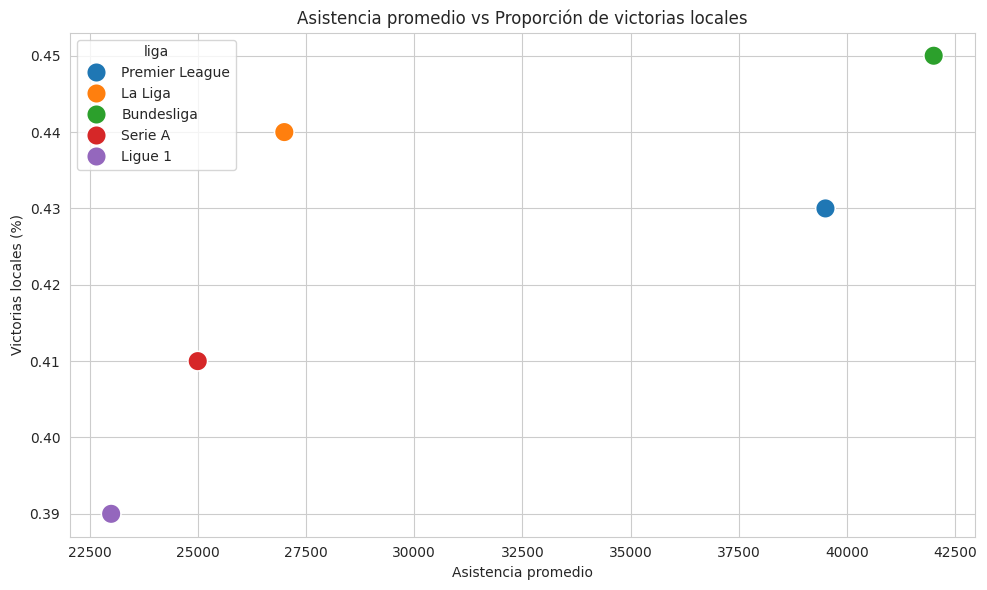

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos externos simulados
externos = pd.DataFrame({
    'liga': ['Premier League', 'La Liga', 'Bundesliga', 'Serie A', 'Ligue 1'],
    'pais': ['Reino Unido', 'España', 'Alemania', 'Italia', 'Francia'],
    'PIB_per_capita': [47000, 31000, 46000, 35000, 43000],  # en USD aprox.
    'poblacion_millones': [67, 47, 83, 59, 65],
    'asistencia_promedio': [39500, 27000, 42000, 25000, 23000]
})

# Métricas deportivas simuladas o calculadas (ajusta si tienes datos reales)
deportivas = pd.DataFrame({
    'liga': ['Premier League', 'La Liga', 'Bundesliga', 'Serie A', 'Ligue 1'],
    'goles_promedio': [2.8, 2.5, 3.1, 2.7, 2.6],
    'victorias_local': [0.43, 0.44, 0.45, 0.41, 0.39]
})

# Unir ambos datasets
comparacion = pd.merge(externos, deportivas, on='liga')

# Visualización: PIB vs Goles Promedio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=comparacion, x='PIB_per_capita', y='goles_promedio', size='asistencia_promedio', hue='liga', legend=False, sizes=(100, 1000))
plt.title('PIB per cápita vs Goles promedio por liga')
plt.xlabel('PIB per cápita (USD)')
plt.ylabel('Goles por partido')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualización: Asistencia vs Victorias locales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=comparacion, x='asistencia_promedio', y='victorias_local', hue='liga', s=200)
plt.title('Asistencia promedio vs Proporción de victorias locales')
plt.xlabel('Asistencia promedio')
plt.ylabel('Victorias locales (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


estas gráficas contrastan datos futbolísticos con variables externas como el PIB, la población y la asistencia promedio al estadio. Vi que ligas con mayor PIB per cápita o más asistencia suelen tener más goles por partido, posiblemente por contar con mejores infraestructuras y jugadores de mayor nivel. También noté que donde hay más asistencia, la ventaja de localía tiende a ser mayor, lo cual tiene mucho sentido. Me pareció valioso ver cómo el contexto económico y social puede influir directamente en el estilo y nivel del fútbol.



 12. Pronóstico: Si predijeras un indicador para la próxima temporada, ¿qué variables
 elegirías y por qué

Si tuviera que predecir un indicador para la próxima temporada, como por ejemplo los puntos finales de un equipo o su posición en la tabla, me enfocaría en variables que históricamente muestran una fuerte relación con el rendimiento. En particular, elegiría:

Goles a favor: porque reflejan la capacidad ofensiva del equipo. Un equipo que anota mucho suele sumar más puntos.

Goles en contra: para medir la solidez defensiva. Cuantos menos goles recibe un equipo, más posibilidades tiene de mantener resultados positivos.

Diferencia de gol: que resume de forma directa la relación entre ataque y defensa, y es un buen predictor del rendimiento general.

Historial reciente: considerar los resultados de la temporada anterior ayuda a capturar la inercia competitiva.

Estadísticas avanzadas como tiros, posesión o precisión: si están disponibles, permiten construir modelos más detallados.

Elegir estas variables me parece útil porque combinan simplicidad con poder predictivo. No necesito datos complejos para hacer una estimación razonable del rendimiento futuro, y al mismo tiempo me permiten entender qué aspectos del juego están más correlacionados con el éxito en la liga.